# K – Nearest Neighbours(Regression)

It assumes that similar things exist in close proximity.

## Algorithm:

* Step 1: Choose the no. K of neighbours
* Step 2: Take the K nearest neighbours of the new data points by Euclidean distance
* Step 3: Among K Neighbours, take the average of these Neighbours
* Step 4: Assign this average value to the new point

In [6]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Regression/50_Startups.csv')

X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#Fitting Nearest Neighbour Regression to the Training set
from sklearn.neighbors import KNeighborsRegressor
NN_model = KNeighborsRegressor(n_neighbors = 3)
NN_model.fit(X_train, y_train)


print("Score Train Set",NN_model.score(X_train, y_train))
print("Score Test Set",NN_model.score(X_test, y_test))

y_predict = NN_model.predict(X_test)
print(y_predict)



Score Train Set 0.925323974795017
Score Test Set 0.8969189588503369
[111698.17333333 138434.37333333 140420.84        76914.72
 163217.69       110608.37        68876.10333333 106574.
 114298.26666667 163217.69       105741.20666667  87079.41333333
 106574.          91203.10333333 129017.49333333 146083.77333333
 144568.21666667]


k = 1 rmse= 18260.397891883887
k = 2 rmse= 13050.828785686093
k = 3 rmse= 9889.573869081936
k = 4 rmse= 9019.094167457928
k = 5 rmse= 10047.213142160233
k = 6 rmse= 10489.374030074561
k = 7 rmse= 11909.247517880343
k = 8 rmse= 12110.816726974532
k = 9 rmse= 12416.760369371954
k = 10 rmse= 12685.979406146987
k = 11 rmse= 12876.018529012208
k = 12 rmse= 13869.344789112145
k = 13 rmse= 14297.242897962047
k = 14 rmse= 14756.971898529795
k = 15 rmse= 15093.751079510112
k = 16 rmse= 15598.487705148094
k = 17 rmse= 16228.347769497905
k = 18 rmse= 16860.351991196156
k = 19 rmse= 17731.534358678884


<AxesSubplot:>

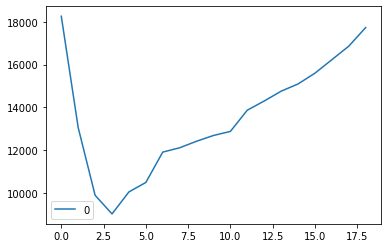

In [4]:
#Find out best value of k
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = []
for k in range(1,20):
    NN_model = KNeighborsRegressor(n_neighbors = k)
    NN_model.fit(X_train, y_train)
    y_predict = NN_model.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_predict))
    rmse.append(error)
    print("k =", k, "rmse=",error)
    
graph = pd.DataFrame(rmse)    
graph.plot()

**Pros
* Easy to understand
* No assumptions about data
* Can be applied to both classification and regression
* Works easily on multi-class problems

**Cons

* Memory Intensive / Computationally expensive
* Sensitive to scale of data
* Not work well on rare event (skewed) target variable
* Struggle when high number of independent variables

Q. How does a boundary becomes smoother with increasing k
- high values of k takes into consideration more points/voters for prediction and hence becomes more resilient to outliers . That is why , the resulting decision boundary becomes more smoother resulting reduced variance and high bias